<a href="https://colab.research.google.com/github/amiramomen/ML2_pro/blob/main/ML2_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <a name="0">Credit Card Dataset for Clustering</a>
1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>





In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from plotnine import *
import seaborn as sns

warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

In [41]:
data_path = 'CC GENERAL.csv'  
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [42]:
df.drop(columns='CUST_ID',inplace=True)

## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [43]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


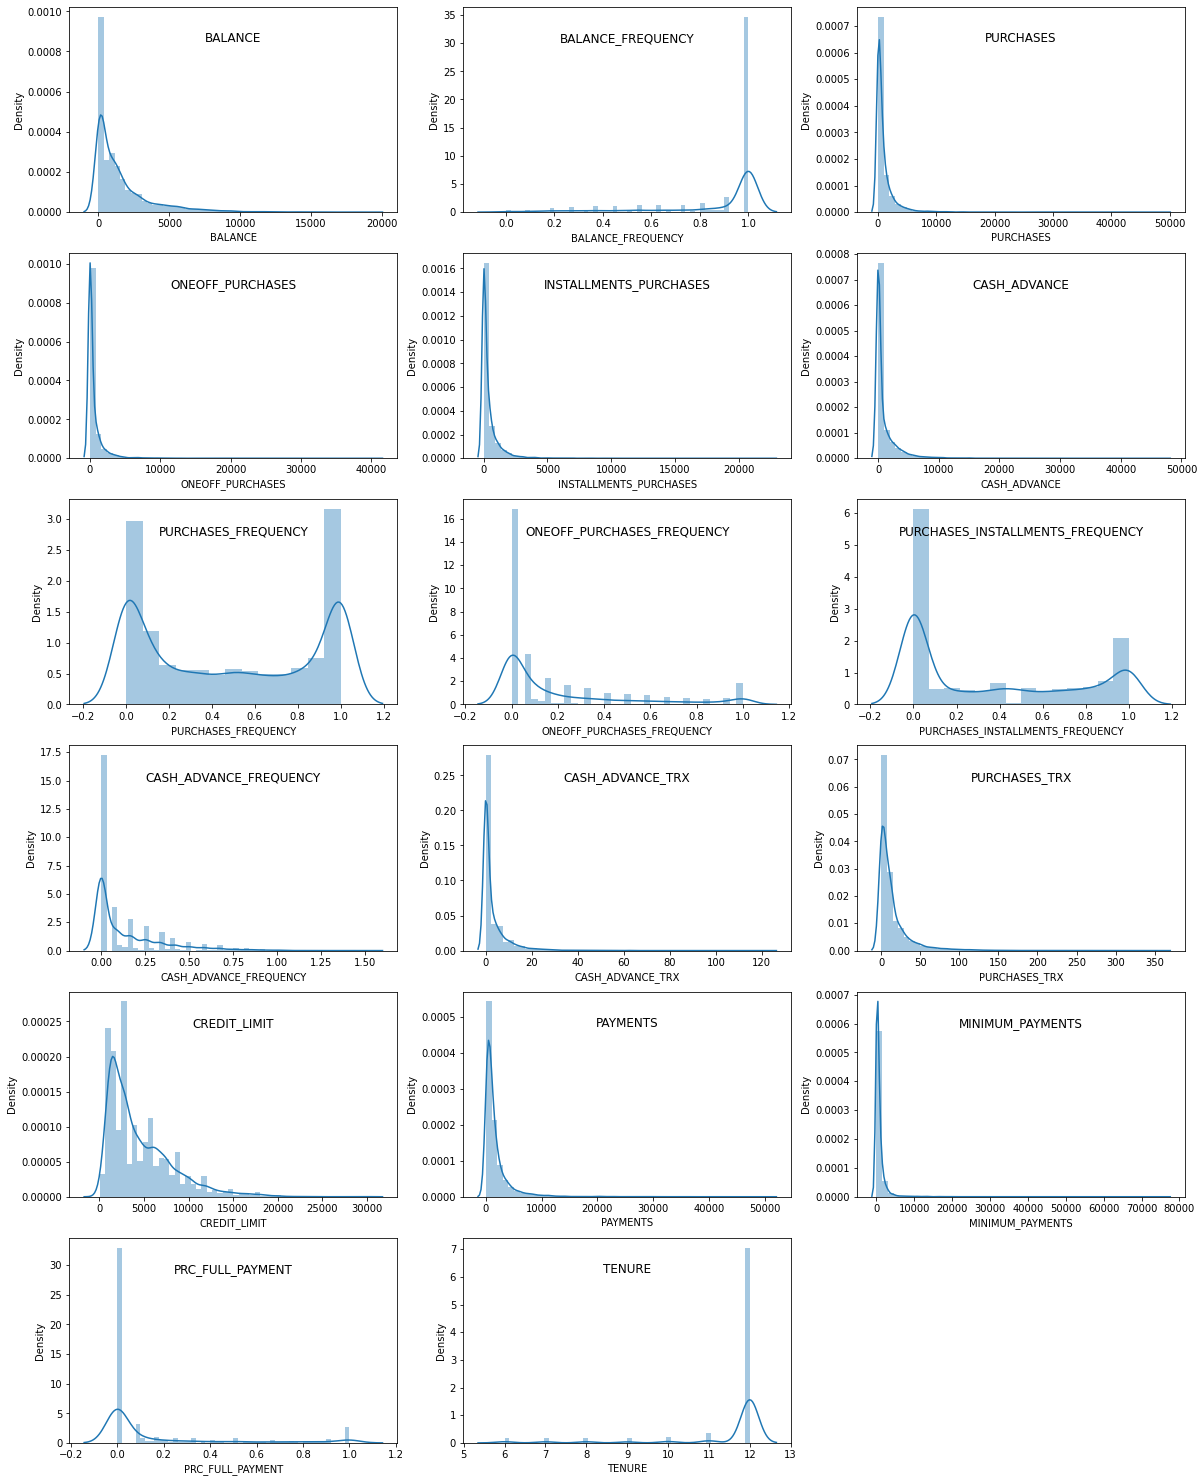

In [25]:
fig, ax=plt.subplots(figsize=(20, 40))
x=1
for col in df:  
  plt.subplot(9,3,x)
  sns.distplot(df[col])
  plt.title(col,y=0.8)
  x+=1

In [ ]:
'''
CUST_ID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFF_PURCHASES : Maximum purchase amount done in one-go
INSTALLMENTS_PURCHASES : Amount of purchase done in installment
CASH_ADVANCE : Cash in advance given by the user
PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASES_TRX : Numbe of purchase transactions made
CREDIT_LIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user 
'''

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)

In [26]:
df_copy=df.copy()

In [27]:
df_copy.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [28]:
df_copy.BALANCE_FREQUENCY.head()

0    0.818182
1    0.909091
2    1.000000
3    0.636364
4    1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [ ]:
df_copy.PURCHASES.head(10)

0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
5    1333.28
6    7091.01
7     436.20
8     861.49
9    1281.60
Name: PURCHASES, dtype: float64

In [ ]:
df_copy.ONEOFF_PURCHASES.head()

0       0.00
1       0.00
2     773.17
3    1499.00
4      16.00
Name: ONEOFF_PURCHASES, dtype: float64

In [ ]:
df_copy.INSTALLMENTS_PURCHASES.head()

0    95.4
1     0.0
2     0.0
3     0.0
4     0.0
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [ ]:
df_copy.CASH_ADVANCE.head()

0       0.000000
1    6442.945483
2       0.000000
3     205.788017
4       0.000000
Name: CASH_ADVANCE, dtype: float64

### Fill CREDIT_LIMIT with median because CREDIT_LIMIT has right sequence

In [44]:
df_copy['CREDIT_LIMIT'] = df_copy['CREDIT_LIMIT'].fillna(df_copy['CREDIT_LIMIT'].mode())

### Fill MINIMUM_PAYMENTS with median because MINIMUM_PAYMENTS has right sequence 

In [45]:
df_copy['MINIMUM_PAYMENTS'] = df_copy['MINIMUM_PAYMENTS'].fillna(df_copy['MINIMUM_PAYMENTS'].median())

In [46]:
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [47]:
df_copy.duplicated().count()

8950

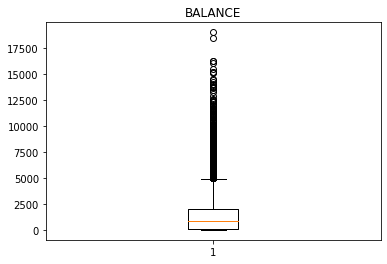

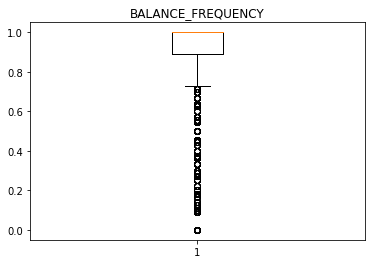

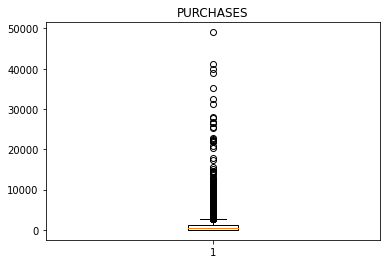

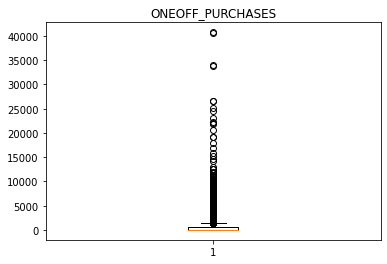

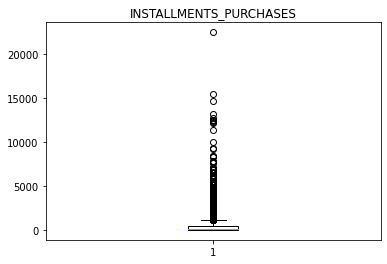

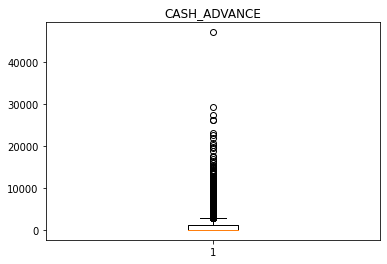

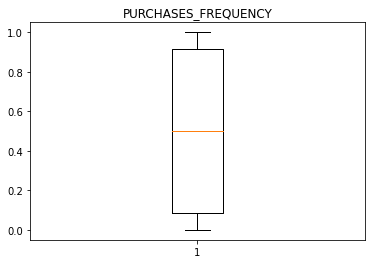

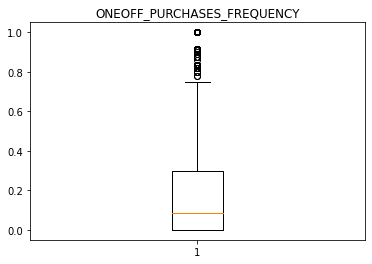

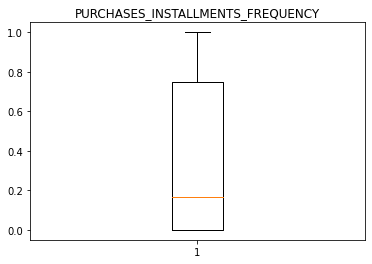

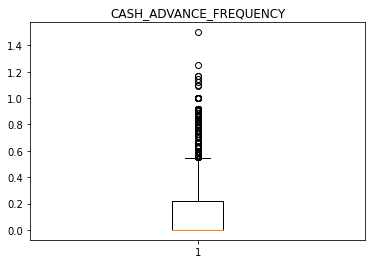

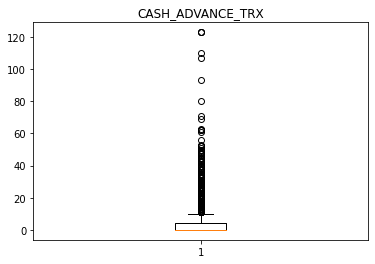

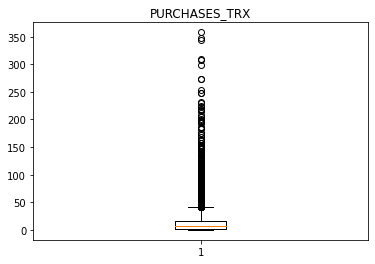

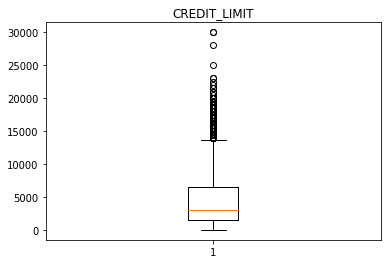

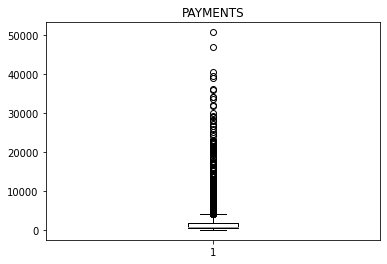

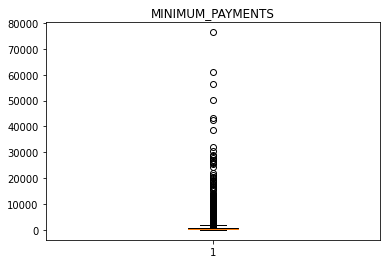

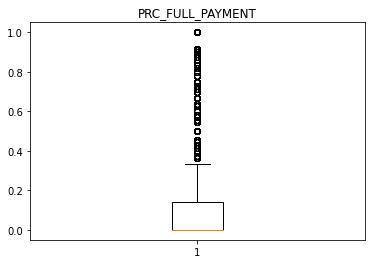

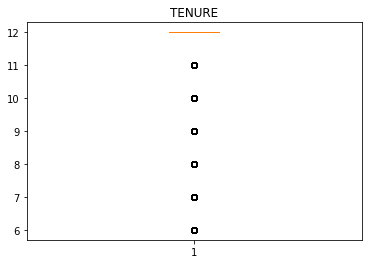

In [48]:
for i in df_copy:
  plt.title(i)
  plt.boxplot(df_copy[i])
  plt.show()

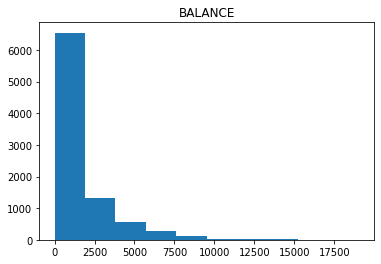

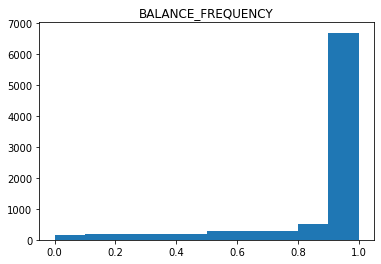

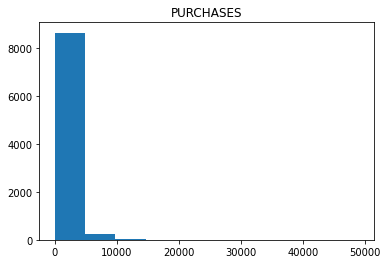

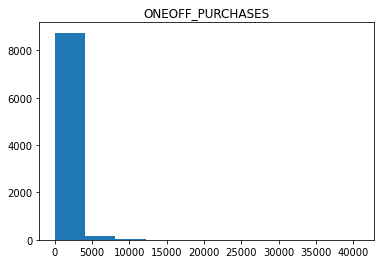

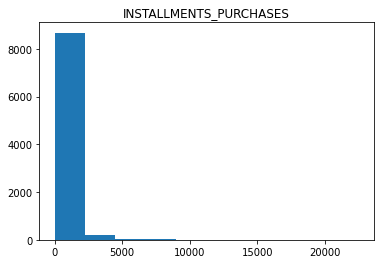

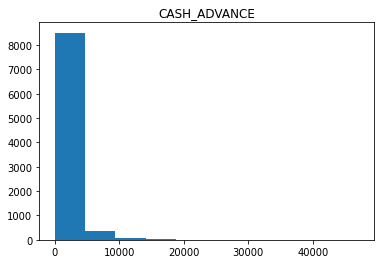

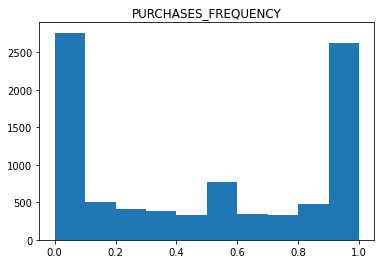

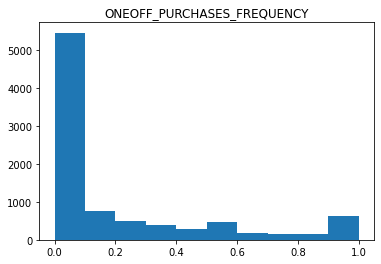

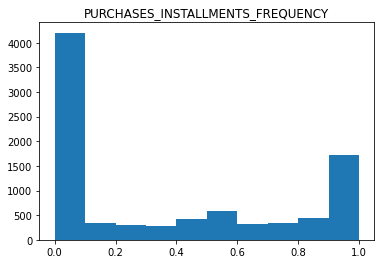

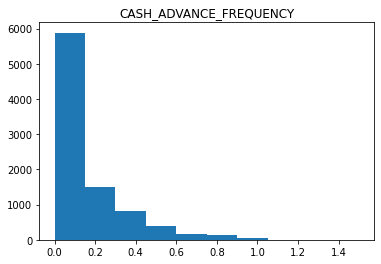

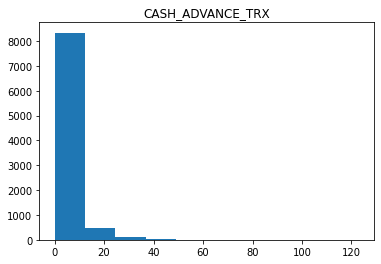

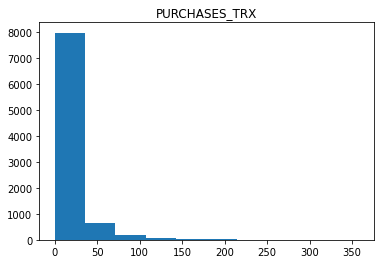

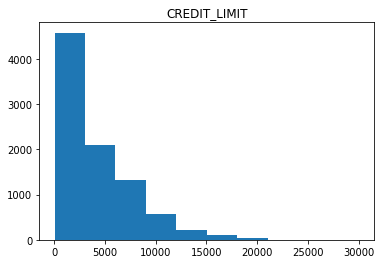

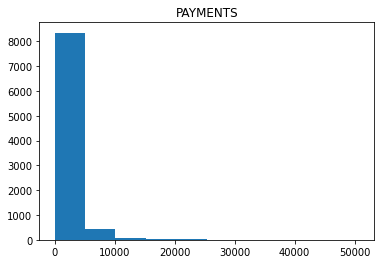

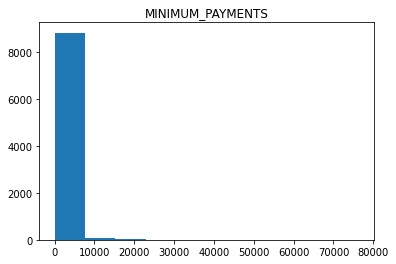

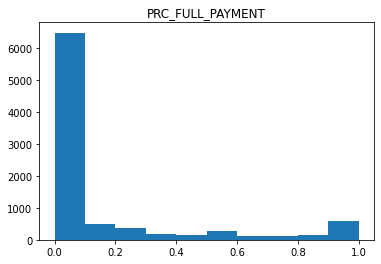

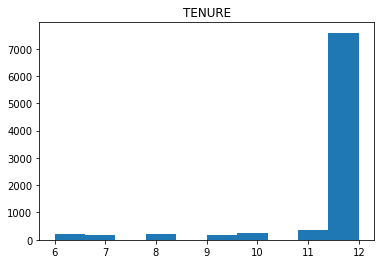

In [49]:
for i in df_copy:
  plt.title(i)
  plt.hist(df_copy[i])
  plt.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

In [51]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler 

### use RobustScaler because data has outliers and we need it to be outlier

In [52]:
transformer_rob = RobustScaler()
transform=transformer_rob.fit_transform(df_copy)
transform

array([[-0.43226678, -1.63636364, -0.24837108, ..., -0.27973218,
         0.        ,  0.        ],
       [ 1.20937371, -0.81818182, -0.33748873, ...,  1.23005435,
         1.55555556,  0.        ],
       [ 0.84209923,  0.        ,  0.38476593, ...,  0.50973191,
         0.        ,  0.        ],
       ...,
       [-0.44135471, -1.5000045 , -0.20259786, ..., -0.37213466,
         1.75000175, -6.        ],
       [-0.44651662, -1.5000045 , -0.33748873, ..., -0.41528832,
         1.75000175, -6.        ],
       [-0.25997614, -3.        ,  0.68376779, ..., -0.36263312,
         0.        , -6.        ]])

In [53]:
df_transform=pd.DataFrame(transform,columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])
df_transform

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.432267,-1.636364,-0.248371,-0.065812,0.013657,0.000000,-0.399999,-0.277777,-0.111112,0.000000,0.00,-0.3125,-0.408163,-0.431595,-0.279732,0.000000,0.0
1,1.209374,-0.818182,-0.337489,-0.065812,-0.189912,5.784542,-0.600000,-0.277777,-0.222223,1.125001,1.00,-0.4375,0.816327,2.138626,1.230054,1.555556,0.0
2,0.842099,0.000000,0.384766,1.273231,-0.189912,0.000000,0.600000,3.055557,-0.222223,0.000000,0.00,0.3125,0.918367,-0.154715,0.509732,0.000000,0.0
3,0.411913,-3.272727,1.062798,2.530286,-0.189912,0.184759,-0.500000,0.000000,-0.222223,0.374999,0.25,-0.3750,0.918367,-0.564547,0.000000,0.000000,0.0
4,-0.028907,0.000000,-0.322542,-0.038102,-0.189912,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.00,-0.3750,-0.367347,-0.117644,-0.109334,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.438709,0.000000,-0.065540,-0.065812,0.431293,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.350037,-0.426406,3.500004,-6.0
8946,-0.443544,0.000000,-0.057245,-0.065812,0.450241,0.000000,0.600000,-0.277777,0.888888,0.000000,0.00,-0.0625,-0.408163,-0.382803,0.000000,0.000000,-6.0
8947,-0.441355,-1.500005,-0.202598,-0.065812,0.118215,0.000000,0.399999,-0.277777,0.666667,0.000000,0.00,-0.1250,-0.408163,-0.511003,-0.372135,1.750002,-6.0
8948,-0.446517,-1.500005,-0.337489,-0.065812,-0.189912,0.032823,-0.600000,-0.277777,-0.222223,0.750002,0.50,-0.4375,-0.510204,-0.529925,-0.415288,1.750002,-6.0


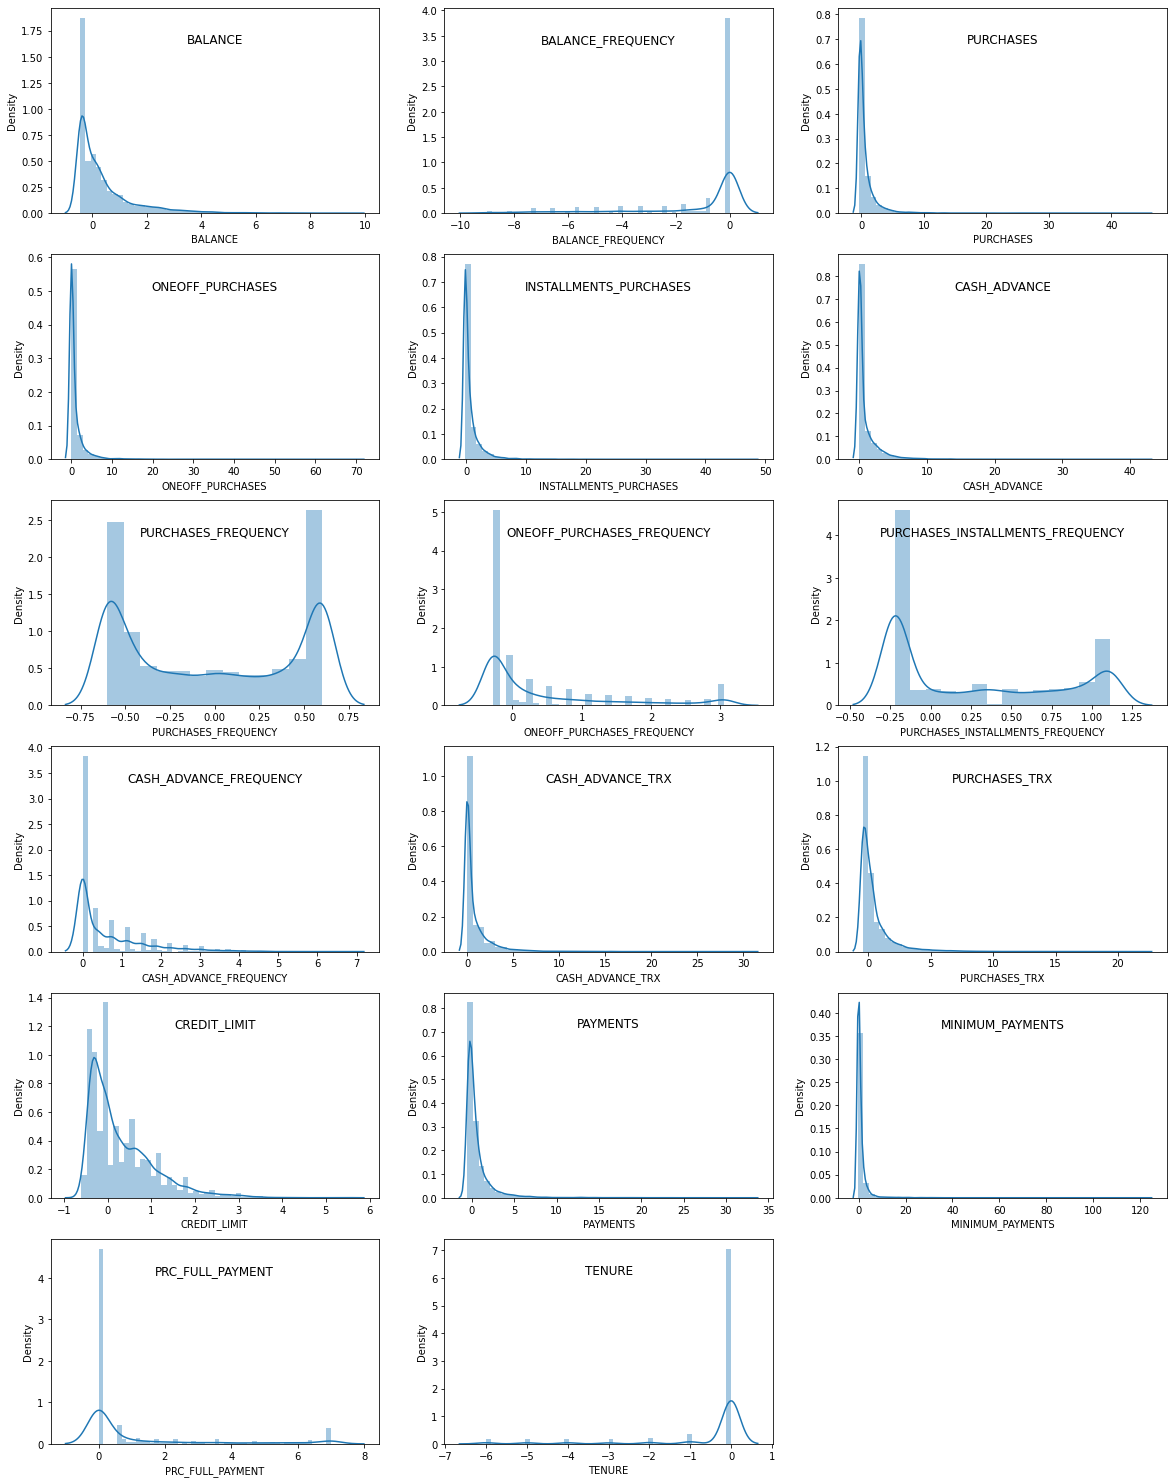

In [54]:
fig, ax=plt.subplots(figsize=(20, 40))
x=1
for col in df_transform:  
  plt.subplot(9,3,x)
  sns.distplot(df_transform[col])
  plt.title(col,y=0.8)
  x+=1

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


### Hierarchical-Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as shc

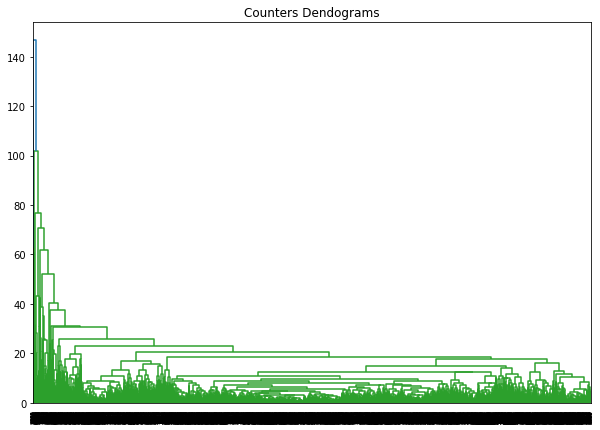

In [55]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_transform , method='complete',metric='euclidean'),orientation='top')

In [73]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='complete',n_clusters=3).fit(df_transform)

In [74]:
silhouette_score(df_transform, clustering.labels_,metric='euclidean')

0.8584915482168708

### DB-Scan

In [77]:
mins = 3
nn = NearestNeighbors()
nn.fit(df_transform)
distances, neighbors = nn.kneighbors(df_transform)


In [78]:
distances = np.sort(distances[:, mins], axis = 0)

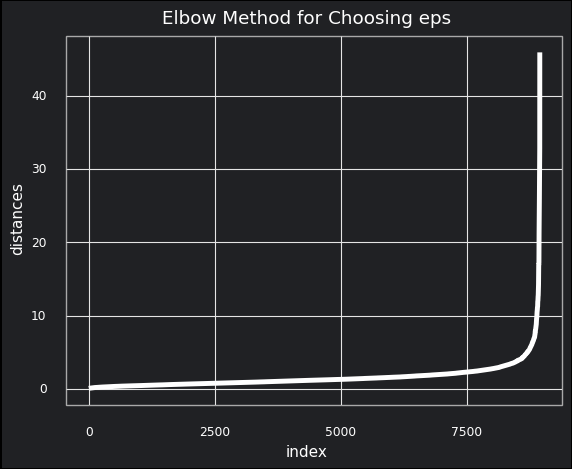

<ggplot: (8779248642211)>

In [79]:
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

In [98]:
db = DBSCAN(eps = 7, min_samples = 20).fit(df_transform)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db.labels_)))]
df_transform["assignments"] = db.labels_



In [99]:
print(silhouette_score(df_transform, df_transform["assignments"]))

0.7720372553692744


### Kmeans

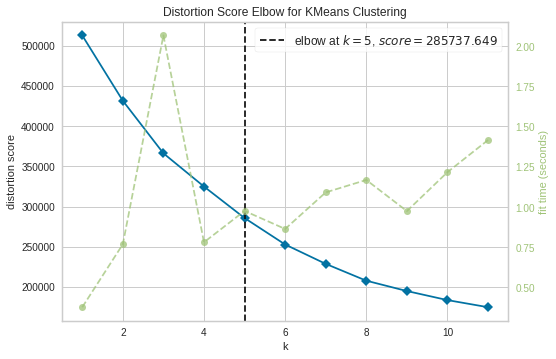

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [167]:
kmeanModel = KMeans()
visualizer = KElbowVisualizer(kmeanModel, k = (1,12))

visualizer.fit(df_transform)
visualizer.show()

In [169]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df_transform)

KMeans(n_clusters=5)

In [170]:
kmeanModel.labels_

array([0, 4, 0, ..., 0, 0, 0], dtype=int32)

In [171]:
silhouette_score(df_transform, kmeanModel.labels_,metric='euclidean')

0.3118473799861224

### GaussianMixture

In [154]:
GaussianModel = GaussianMixture(2).fit(df_transform)
lables= GaussianModel.predict(df_transform)
silhouette_score(df_transform,lables)

0.2962328804910145

### the best model without PCA is Kmeans

### PCA

In [157]:
pca = PCA()
pca.fit(df_transform)

PCA()

In [161]:
df_transform.shape[1]

18

In [164]:
pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, "pc": range(df_transform.shape[1]), "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF

,expl_var,pc,cum_var
0,3.026709e-01,0,0.302671
1,2.455701e-01,1,0.548241
2,1.232193e-01,2,0.671460
3,8.022965e-02,3,0.751690
4,6.953360e-02,4,0.821224
5,5.325162e-02,5,0.874475
6,3.255262e-02,6,0.907028
7,2.615829e-02,7,0.933186
8,2.010857e-02,8,0.953295
9,1.482701e-02,9,0.968122


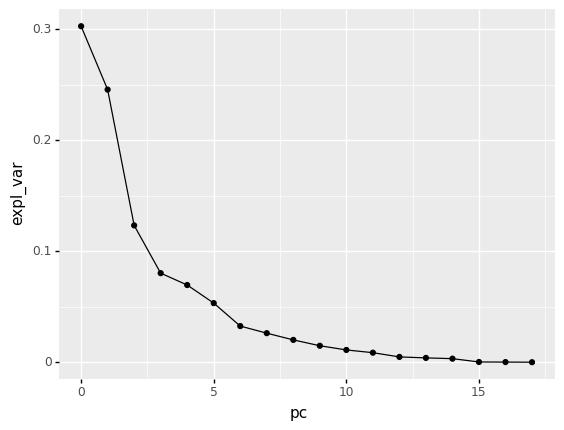

<ggplot: (8779239742486)>

In [165]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

In [166]:
for i in range (df_transform.shape[1]+1):
  pcomps = pca.transform(df_transform)
  pcomps = pd.DataFrame(pcomps[:,:i+1])

  clustering = AgglomerativeClustering(affinity='euclidean',linkage='average',n_clusters=3).fit(pcomps)

  print(f"PC{i+1}: ", silhouette_score(pcomps, clustering.labels_,metric='euclidean'))

PC1:  0.8857627561474147
PC2:  0.9027514973260719
PC3:  0.9236404396285729
PC4:  0.8824194602254222
PC5:  0.8771604125154617
PC6:  0.8715436296902793
PC7:  0.8671273682103661
PC8:  0.8640520563874817
PC9:  0.8619031152191996
PC10:  0.8605442240752008
PC11:  0.8604313124527067
PC12:  0.8622814348148532
PC13:  0.8596815938775904
PC14:  0.8591167420357173
PC15:  0.8594441117451805
PC16:  0.8594149335899942
PC17:  0.8594075395071783
PC18:  0.8594074104168044
PC19:  0.8594074104168044


In [181]:
pca_f=PCA(n_components= 3)
pcomps = pca_f.fit_transform(df_transform)

clustering2 = AgglomerativeClustering(affinity='euclidean',linkage='average',n_clusters=3).fit(pcomps)
GaussianModel2 = GaussianMixture(2).fit(pcomps)
dbModel2 = DBSCAN(eps = 7, min_samples = 20).fit(pcomps)
kmeanModel2 = KMeans(n_clusters=3).fit(pcomps)



In [182]:
print(f"PC{3}: silhouette for Hierarchical-Clustering >> ", silhouette_score(pcomps, clustering.labels_,metric='euclidean'))
print(f"PC{3}: silhouette for GaussianMixture >> ", silhouette_score(pcomps, GaussianModel.predict(df_transform) ,metric='euclidean'))
print(f"PC{3}: silhouette for DBScan >> ", silhouette_score(pcomps, dbModel2.labels_ ,metric='euclidean'))
print(f"PC{3}: silhouette for Kmeans >> ", silhouette_score(pcomps, kmeanModel2.labels_ ,metric='euclidean'))

PC3: silhouette for Hierarchical-Clustering >>  0.8928596445841818
PC3: silhouette for GaussianMixture >>  0.4152049687669287
PC3: silhouette for DBScan >>  0.8904782850788842
PC3: silhouette for Kmeans >>  0.6732325768440481


### After applying PCA, the best number of components is 3, and hierarchical clustering and DBScan were the best models.